## Predicting the severity of the impact of accidents on traffic in the US

### The description of each of the fields of the dataset is given below

- ID	This is a unique identifier of the accident record.
- Source    shows the source which reported the accident
- Severity	Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
- Start_Time	Shows start time of the accident in local time zone.
- End_Time	Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.
- Start_Lat	Shows latitude in GPS coordinate of the start point.
- Start_Lng	Shows longitude in GPS coordinate of the start point.
- End_Lat	Shows latitude in GPS coordinate of the end point.
- End_Lng	Shows longitude in GPS coordinate of the end point.
- Distance(mi)	The length of the road extent affected by the accident.
- Description	Shows natural language description of the accident.
- Street	Shows the street name in address field.
- City	Shows the city in address field.
- County	Shows the county in address field.
- State	Shows the state in address field.
- Zipcode	Shows the zipcode in address field.
- Country	Shows the country in address field.
- Timezone	Shows timezone based on the location of the accident (eastern, central, etc.).
- Airport_Code	Denotes an airport-based weather station which is the closest one to location of the accident.
- Weather_Timestamp	Shows the time-stamp of weather observation record (in local time).
- Temperature(F)	Shows the temperature (in Fahrenheit).
- Wind_Chill(F)	Shows the wind chill (in Fahrenheit).
- Humidity(%)	Shows the humidity (in percentage).
- Pressure(in)	Shows the air pressure (in inches).
- Visibility(mi)	Shows visibility (in miles).
- Wind_Direction	Shows wind direction.
- Wind_Speed(mph)	Shows wind speed (in miles per hour).
- Precipitation(in)	Shows precipitation amount in inches, if there is any.
- Weather_Condition	Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
- Amenity	A https://wiki.openstreetmap.org/wiki/Points_of_interest annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:amenity in a nearby location.
- Bump	A POI annotation which indicates presence of speed bump or hump in a nearby location.
- Crossing	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:crossing in a nearby location.
- Give_Way	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Tag:highway%3Dgive_way in a nearby location.
- Junction	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:junction in a nearby location.
- No_Exit	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:noexit in a nearby location.
- Railway	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:railway in a nearby location.
- Roundabout	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Tag:junction%3Droundabout in a nearby location.
- Station	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:station in a nearby location.
- Stop	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:stop in a nearby location.
- Traffic_Calming	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Key:traffic_calming in a nearby location.
- Traffic_Signal	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Tag:highway%3Dtraffic_signals in a nearby loction.
- Turning_Loop	A POI annotation which indicates presence of https://wiki.openstreetmap.org/wiki/Tag:highway%3Dturning_loop in a nearby location.
- Sunrise_Sunset	Shows the period of day (i.e. day or night) based on sunrise/sunset.
- Civil_Twilight	Shows the period of day (i.e. day or night) based on https://en.wikipedia.org/wiki/Twilight#Civil_twilight.
- Nautical_Twilight	Shows the period of day (i.e. day or night) based on https://en.wikipedia.org/wiki/Twilight#Nautical_twilight.
- Astronomical_Twilight	Shows the period of day (i.e. day or night) based on https://en.wikipedia.org/wiki/Twilight#Astronomical_twilight.


Importing the required modules

In [1]:
import dask.dataframe as dd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset from the local CSV file

In [2]:
df1=dd.read_csv('US_Accidents_March23.csv')

Checking the number of rows and columns in the dataset

In [3]:
shape=df1.shape
print("Number of rows in the dataset:",shape[0].compute())
print("Number of columns in the dataset:",shape[1])

Number of rows in the dataset: 7728394
Number of columns in the dataset: 46


Displaying the first five records from the Dataset

In [18]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


Dask by default displays only a few columns from the Dataset incase the number of columns is high. We need to make the following adjustments to display all the columns.

In [25]:
pd.set_option('display.max_columns', None)  # Show all columns

print(df1.head(5))  # Only display the first 5 rows

# Reset the option back to default
pd.reset_option('display.max_columns')

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  \
0  39.865147 -84.058723      NaN      NaN          0.01   
1  39.928059 -82.831184      NaN      NaN          0.01   
2  39.063148 -84.032608      NaN      NaN          0.01   
3  39.747753 -84.205582      NaN      NaN          0.01   
4  39.627781 -84.188354      NaN      NaN          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at .

Displaying the number of NaN (Null) values in each of the columns of the Dataset

In [19]:
print(df1.isna().sum().compute())

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

- The 'End_Lat' and 'End_Lng' columns both have 3402762 Null values which is close to 44% of the Dataset
- The 'Wind_Chill(F)' column has 1999019 Null values which is close to 25% of the Dataset
- The 'Precipitation(in)' column has 2203586 Null values which is close to 29% of the Dataset

Since the number of Null values in these columns are significant, we can think about dropping these features from the Dataset based on the EDA

Checking if there are any duplicate rows

In [22]:
def count_duplicates(df1):
    return df1.duplicated().sum()

num_duplicates = df1.reduction(count_duplicates, aggregate=sum, meta=int).compute()

print("Number of duplicated records:", num_duplicates)


Number of duplicated records: 0


Checking the number of features for each datatype

In [4]:
df1.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 46 entries, ID to Astronomical_Twilight
dtypes: object(20), bool(13), float64(12), int64(1)

- There are 20 features of datatype 'Object'
- There are 13 features of datatype 'bool'
- There are 12 features of datatype 'float64'
- There is one features of datatype 'int64'

Checking the Datatype of the columns in the Dataset

In [29]:
print(df1.dtypes)

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

Dask has read the Start_Time, End_Time and Weather_Timestamp as object datatype. Let us convert them into Date format for better analysis.

In [38]:
date_columns = ['Start_Time', 'End_Time', 'Weather_Timestamp']

In [82]:
#Converting the date columns from object datatype to datetime64[ns] datatype
for column in date_columns:
    df1[column] = dd.to_datetime(df1[column], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [83]:
print(df1[date_columns].dtypes)

Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Weather_Timestamp    datetime64[ns]
dtype: object


The datatype of the Start_Time, End_Time and Weather_Timestamp are now changed to datetime64[ns]

Printing the date columns to check if the data is retained properly

In [55]:
print(df1[date_columns].compute())

                Start_Time            End_Time   Weather_Timestamp
0      2016-02-08 05:46:00 2016-02-08 11:00:00 2016-02-08 05:58:00
1      2016-02-08 06:07:59 2016-02-08 06:37:59 2016-02-08 05:51:00
2      2016-02-08 06:49:27 2016-02-08 07:19:27 2016-02-08 06:56:00
3      2016-02-08 07:23:34 2016-02-08 07:53:34 2016-02-08 07:38:00
4      2016-02-08 07:39:07 2016-02-08 08:09:07 2016-02-08 07:53:00
...                    ...                 ...                 ...
133720 2019-08-23 18:03:25 2019-08-23 18:32:01 2019-08-23 17:53:00
133721 2019-08-23 19:11:30 2019-08-23 19:38:23 2019-08-23 18:53:00
133722 2019-08-23 19:00:21 2019-08-23 19:28:49 2019-08-23 18:53:00
133723 2019-08-23 19:00:21 2019-08-23 19:29:42 2019-08-23 18:51:00
133724 2019-08-23 18:52:06 2019-08-23 19:21:31 2019-08-23 20:50:00

[7728394 rows x 3 columns]


Checking the number of features for each datatype after converting the date columns to datetime64[ns] datatype

In [84]:
df1.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 46 entries, ID to Astronomical_Twilight
dtypes: datetime64[ns](3), object(17), bool(13), float64(12), int64(1)

- There are 17 features of datatype 'Object'
- There are 13 features of datatype 'bool'
- There are 12 features of datatype 'float64'
- There is one features of datatype 'int64'
- There are 3 features of datatype 'datetime64[ns]'

In [57]:
string_columns = df1.select_dtypes(include='object').columns
print(string_columns)

Index(['ID', 'Source', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


The ID column is also a string column but it does not serve any purpose for analysis hence we are creating another list of columns excluding it

In [60]:
string_columns_for_analysis = ['Source', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight']
print(string_columns_for_analysis)

['Source', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


Finding the unique number of values in each of the Categorical features (object dataype columns)

In [62]:
unique_counts = df1[string_columns_for_analysis].describe(include=['object', 'category']).compute()

# Print the unique counts
print(unique_counts)

         Source                                        Description   Street  \
unique        3                                            3761578   336306   
count   7728394                                            7728389  7717525   
top     Source1  A crash has occurred causing no to minimum del...   I-95 N   
freq    4325632                                               9593    78430   

           City       County    State  Zipcode  Country    Timezone  \
unique    13678         1871       49   825094        1           4   
count   7728141      7728394  7728394  7726479  7728394     7720586   
top       Miami  Los Angeles       CA    91761       US  US/Eastern   
freq     186917       526851  1741433    11247  7728394     3580167   

       Airport_Code Wind_Direction Weather_Condition Sunrise_Sunset  \
unique         2045             24               144              2   
count       7705759        7553188           7554935        7705148   
top            KCQT           CALM 

The key findings are:

- All the data is collected from only one Country that is US hence this feature can be dropped from the Dataset
- The Dataset has data collected from 49 states of the US. The US has 50 states in total and one state is not part of this dataset.
- The Dataset has data collected from  4 different timezones. The US has 6 different timezones and 2 are not part of this dataset.
- The Sunrise_Sunset, Civil_Twilight, Nautical_Twilight and Astronomical_Twilight columns represent whether the accident happened during daytime or at night.

Most number of accidents have happened at:
- City: Miami (186917 accidents in total)
- County: Los Angeles (526851 accidents in total)
- State: California (1741433 accidents in total)
- Timezone: US/Eastern (3580167 accidents in total)

Most of the accidents have happened during the Daytime

With respect to the weather conditions, the highest number of accidents have happened when:
- The wind direction was calm
- The weather condition was fair

Let us check some statistics of the features of bool datatype

In [88]:
bool_cols = df1.select_dtypes(include=['bool']).columns
bool_stats = df1[bool_cols].describe(include='all').compute()  # Trigger computation
print(bool_stats)

        Amenity     Bump Crossing Give_Way Junction  No_Exit  Railway  \
unique        2        2        2        2        2        2        2   
count   7728394  7728394  7728394  7728394  7728394  7728394  7728394   
top       False    False    False    False    False    False    False   
freq    7632060  7724880  6854631  7691812  7157052  7708849  7661415   

       Roundabout  Station     Stop Traffic_Calming Traffic_Signal  \
unique          2        2        2               2              2   
count     7728394  7728394  7728394         7728394        7728394   
top         False    False    False           False          False   
freq      7728145  7526493  7514023         7720796        6584622   

       Turning_Loop  
unique            1  
count       7728394  
top           False  
freq        7728394  


- The Variance of the boolean features is extremely less. All the boolean features are mostly having False value.
- The 'Turning_Loop' feature has no variance at all. All the values are False hence we can drop from this feature from the dataset.

For the remaining boolean features we can think about dropping them based on their correlation with the Predictor that is 'Severity'

In [93]:
numerical_columns = df1.select_dtypes(include='number').columns

# Print or use the list as needed
print(numerical_columns)

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')


In [95]:
numerical_columns_for_analysis = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)']
print(numerical_columns_for_analysis)

['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


Checking the Statistics of the Dataset

In [104]:
df1.describe().compute()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.403331e+01,-9.791322e+01,3.403955e+01,-1.171198e+02,0.000000e+00,5.700000e+01,5.500000e+01,5.500000e+01,2.965000e+01,1.000000e+01,5.800000e+00,0.000000e+00
50%,2.000000e+00,3.886809e+01,-8.480862e+01,3.840524e+01,-8.491896e+01,1.360000e-01,7.000000e+01,6.900000e+01,7.500000e+01,2.996000e+01,1.000000e+01,8.100000e+00,0.000000e+00
75%,3.000000e+00,4.182733e+01,-8.004899e+01,4.182804e+01,-8.004850e+01,1.075000e+00,8.600000e+01,8.500000e+01,8.900000e+01,3.026000e+01,1.000000e+01,1.200000e+01,6.000000e-02
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


- The Severity which is our Lable (or) Predicted variable has values ranging from 1 to 4
- The shortest distance affected by an accident is 0 miles whereas the longest distance affected by an accident is a whopping 441.75 miles
- The average severity pf an accident is 2
- The average distance affected by an accident is 0.56 miles
- 75% of the accidents have affected the traffic for an approximate distance of 1 mile
- 25% of the accidents have not affected the traffic at all
- The average temperature in the areas where accidents have happened is around 61 F
- 50% of the accidents have happened when there is no precipitation

In [99]:
mean = df1.mean().compute()
print(mean)

Severity              2.212384
Start_Lat            36.201195
Start_Lng           -94.702545
End_Lat              36.261829
End_Lng             -95.725570
Distance(mi)          0.561842
Temperature(F)       61.663286
Wind_Chill(F)        58.251048
Humidity(%)          64.831041
Pressure(in)         29.538986
Visibility(mi)        9.090376
Wind_Speed(mph)       7.685490
Precipitation(in)     0.008407
Amenity               0.012465
Bump                  0.000455
Crossing              0.113059
Give_Way              0.004733
Junction              0.073928
No_Exit               0.002529
Railway               0.008667
Roundabout            0.000032
Station               0.026125
Stop                  0.027738
Traffic_Calming       0.000983
Traffic_Signal        0.147996
Turning_Loop          0.000000
dtype: float64


In [101]:
std = df1.std().compute()
print(std)

Severity              0.487531
Start_Lat             5.076079
Start_Lng            17.391756
End_Lat               5.272905
End_Lng              18.107928
Distance(mi)          1.776811
Temperature(F)       19.013653
Wind_Chill(F)        22.389832
Humidity(%)          22.820968
Pressure(in)          1.006190
Visibility(mi)        2.688316
Wind_Speed(mph)       5.424983
Precipitation(in)     0.110225
Amenity               0.110949
Bump                  0.021319
Crossing              0.316665
Give_Way              0.068637
Junction              0.261653
No_Exit               0.050225
Railway               0.092690
Roundabout            0.005676
Station               0.159506
Stop                  0.164222
Traffic_Calming       0.031339
Traffic_Signal        0.355096
Turning_Loop          0.000000
dtype: float64


In [102]:
min = df1.min().compute()
print(min)

ID                                   A-1
Source                           Source1
Severity                               1
Start_Time           2016-01-14 20:18:33
End_Time             2016-02-08 06:37:08
Start_Lat                        24.5548
Start_Lng                    -124.623833
End_Lat                        24.566013
End_Lng                      -124.545748
Distance(mi)                         0.0
County                         Abbeville
State                                 AL
Country                               US
Weather_Timestamp    2016-01-14 19:51:00
Temperature(F)                     -89.0
Wind_Chill(F)                      -89.0
Humidity(%)                          1.0
Pressure(in)                         0.0
Visibility(mi)                       0.0
Wind_Speed(mph)                      0.0
Precipitation(in)                    0.0
Amenity                            False
Bump                               False
Crossing                           False
Give_Way        

The dataset has data about accidents which happened in the US starting from 14-Jan-2016

In [103]:
max = df1.max().compute()
print(max)

ID                              A-999999
Source                           Source3
Severity                               4
Start_Time           2023-03-31 23:30:00
End_Time             2023-03-31 23:59:00
Start_Lat                      49.002201
Start_Lng                     -67.113167
End_Lat                           49.075
End_Lng                       -67.109242
Distance(mi)                      441.75
County                           Ziebach
State                                 WY
Country                               US
Weather_Timestamp    2023-03-31 23:53:00
Temperature(F)                     207.0
Wind_Chill(F)                      207.0
Humidity(%)                        100.0
Pressure(in)                       58.63
Visibility(mi)                     140.0
Wind_Speed(mph)                   1087.0
Precipitation(in)                  36.47
Amenity                             True
Bump                                True
Crossing                            True
Give_Way        

The dataset has data about accidents which happened in the US till 31-March-2023

Let's check the correlation between the numerical and boolean columns in the Dataset

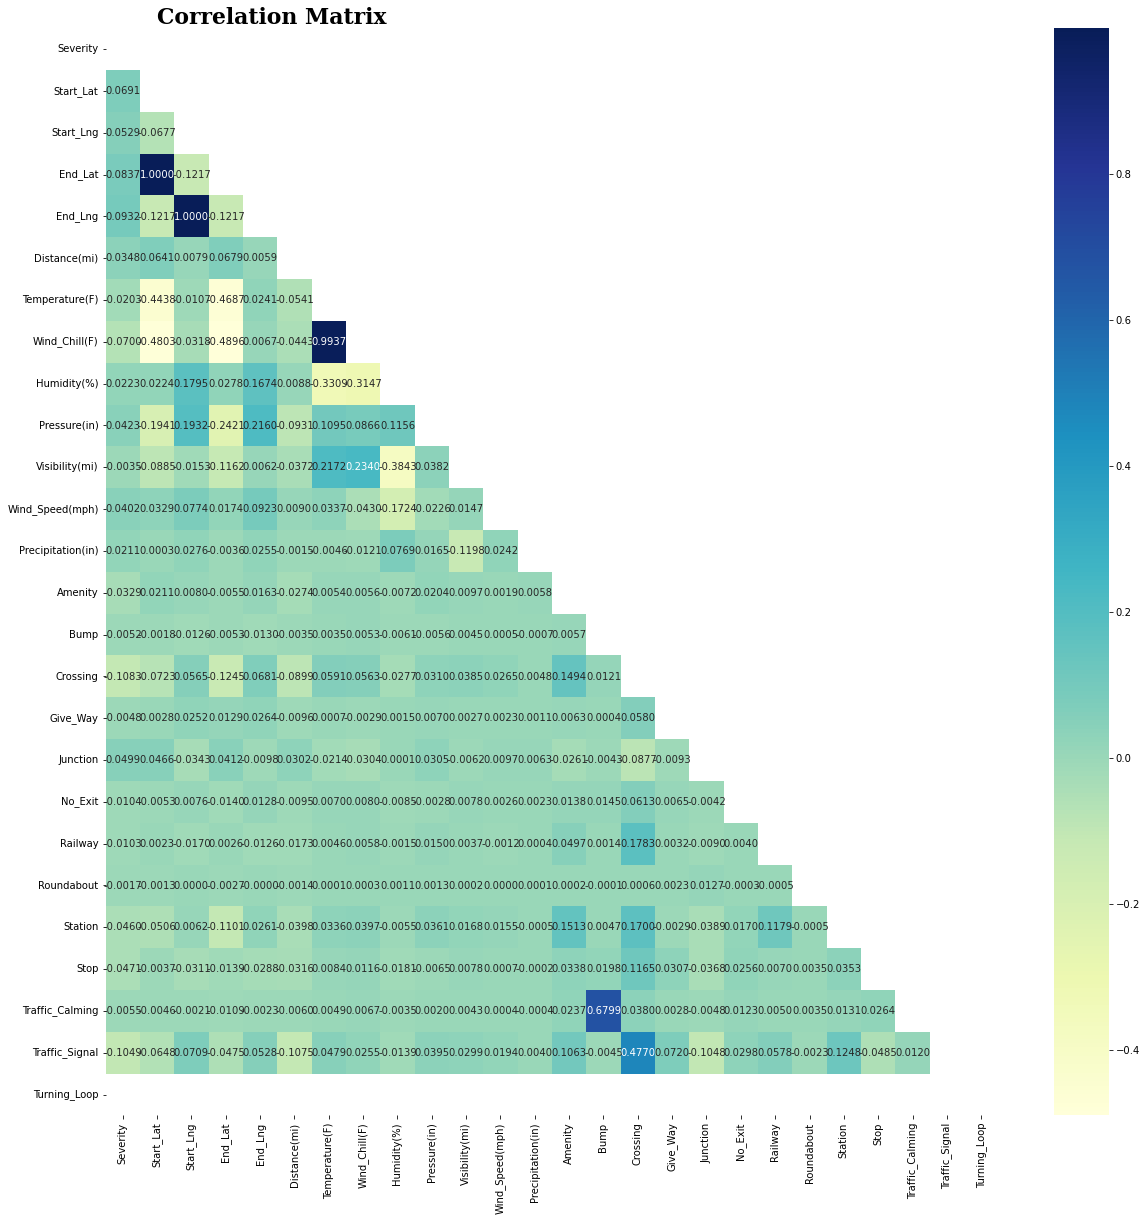

In [107]:
df_corr = df1.corr().compute()
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]
mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df1.corr().compute()
sns.heatmap(df_corr,mask=mask,fmt=".4f",annot=True,cmap='YlGnBu',ax=ax0)
plt.show()

### Some of the findings form the Correlation matrix are
- As expected, the Turning_Loop column has no correlation with any other column including the Dependent variable due to the fact that it had not Variance
- The End_Lat column has a 100% positive correlation with the Start_Lat column. It had also significant amount of missing value hence we can drop that feature from the dataset before training
- The End_Lng column has a 100% positive correlation with the Start_Lng column. It had also significant amount of missing value hence we can drop that feature from the dataset before training
- The Traffic_Calming column has a 68% positive correlation with the Bump column which makes sense because vehicles usually slow down before hitting a speed bump
- The Wind_Chill column has a 99% positive correlation with the Temperature column

The below code will plot the distribution of the numerical variables against the Dependent variable. 

However due to limitations in my Laptop Hardware and the huge size of the Dataset, the below code was not executed successfully hence the code has been commented

In [ ]:
'''
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[0,0])
ax11 = fig.add_subplot(gs[0,1])
ax12 = fig.add_subplot(gs[1,0])
ax13 = fig.add_subplot(gs[1,1])
ax14 = fig.add_subplot(gs[2,0])
ax15 = fig.add_subplot(gs[2,1])
ax16 = fig.add_subplot(gs[3,0])
ax17 = fig.add_subplot(gs[3,1])
ax18 = fig.add_subplot(gs[4,0])
ax19 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
#color_palette = ["#800000","#8000ff","#6aac90","#5833ff"]
color_palette = ["red","green","blue","purple"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color) 
ax16.set_facecolor(background_color) 
ax17.set_facecolor(background_color)
ax18.set_facecolor(background_color)
ax19.set_facecolor(background_color)

#Start_Lat title
ax0.text(0.5,0.5,"Distribution of Start_Lat\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

#Start_Lat
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df1, x='Start_Lat',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

#Start_Lng title
ax2.text(0.5,0.5,"Distribution of Start_Lng\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

#Start_Lng
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df1, x='Start_Lng',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

#Distance(mi) title
ax4.text(0.5,0.5,"Distribution of Distance(mi)\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

#Distance(mi)
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df1, x='Distance(mi)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

#Temperature title
ax6.text(0.5,0.5,"Distribution of Temperature\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

#Temperature
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df1, x='Temperature(F)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

#Wind_Chill(F) title

ax8.text(0.5,0.5,"Distribution of Wind_Chill\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

#Wind_Cill(F)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='Wind_Chill(F)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

#Humidity(%) title

ax8.text(0.5,0.5,"Distribution of Humidity(%)\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

#Humidity(%)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='Humidity(%)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

#Pressure(in)title

ax8.text(0.5,0.5,"Distribution of Pressure(in)\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

#Pressure(in)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='Pressure(in)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

#Visibility(mi) title

ax8.text(0.5,0.5,"Distribution of Visibility(mi)\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

#Visibility(mi)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='Visibility(mi)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

#Wind_Speed(mph) title

ax8.text(0.5,0.5,"Distribution of Wind_Speed(mph)\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

#Wind_Speed(mph)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='Wind_Speed(mph)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

#Precipitation(in) title

ax8.text(0.5,0.5,"Distribution of Precipitation(in)\naccording to\n Severity\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

#Precipitation(in)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df1, x='Precipitation(in)',hue="Severity", fill=True,palette=color_palette, alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    ax14.spines[i].set_visible(False)
    ax15.spines[i].set_visible(False)
    ax16.spines[i].set_visible(False)
    ax17.spines[i].set_visible(False)
    ax18.spines[i].set_visible(False)
    ax19.spines[i].set_visible(False)
'''  
    